In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Specify the counts and this will give you sensitivity against counts for that count level

In [6]:
counts = 0.0079

file = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/sen_outputs/'
path = f'sen_bands_{counts}/band_outputs/'
folder = os.path.join(file, path)

labels = ["10GeV", "60GeV", "1000GeV"]
sensitivities = {}
upper_bands = {}
lower_bands = {}
y_err_1_sigma = {}
y_err_2_sigma = {}

for i, label in enumerate(labels):


    #sensitivity

    sen_path = "sensitivity.txt"
    data_array = np.loadtxt(folder + sen_path, delimiter="\t", skiprows=1)
    sen = data_array[:, i]

    sensitivities[f"{label}"] = sen

    # 1 sigma
    lo_path_1 = "1_sigma_lower.txt"
    up_path_1 = "1_sigma_upper.txt"
    lo_array_1 = np.loadtxt(folder + lo_path_1, delimiter="\t", skiprows=1)
    up_array_1 = np.loadtxt(folder + up_path_1, delimiter="\t", skiprows=1)
    
    lower = sen - lo_array_1[:, i]
    upper = up_array_1[:, i] - sen
    
    lower_bands[f"1sigma_{label}"] = lower
    upper_bands[f"1sigma_{label}"] = upper
    y_err_1_sigma[label] = np.vstack((lower, upper))
    
    # 2 sigma
    lo_path_2 = "2_sigma_lower.txt"
    up_path_2 = "2_sigma_upper.txt"
    lo_array_2 = np.loadtxt(folder + lo_path_2, delimiter="\t", skiprows=1)
    up_array_2 = np.loadtxt(folder + up_path_2, delimiter="\t", skiprows=1)
    
    lower2 = sen - lo_array_2[:, i]
    upper2 = up_array_2[:, i] - sen
    
    lower_bands[f"2sigma_{label}"] = lower2
    upper_bands[f"2sigma_{label}"] = upper2
    y_err_2_sigma[label] = np.vstack((lower2, upper2))


In [9]:
#Pb214 counts

bkg_counts = np.array([0.1342, 0.9164, 1.7004, 6.0363, 10.3646])

In [10]:
print(sensitivities['10GeV'])
print(lower_bands["1sigma_10GeV"])
print(y_err_1_sigma["10GeV"])

[1.53350439e-48 1.53350439e-48]
[6.91340762e-49 6.91340762e-49]
[[6.91340762e-49 6.91340762e-49]
 [9.94826912e-49 9.94826912e-49]]


ValueError: x and y must have same first dimension, but have shapes (5,) and (2,)

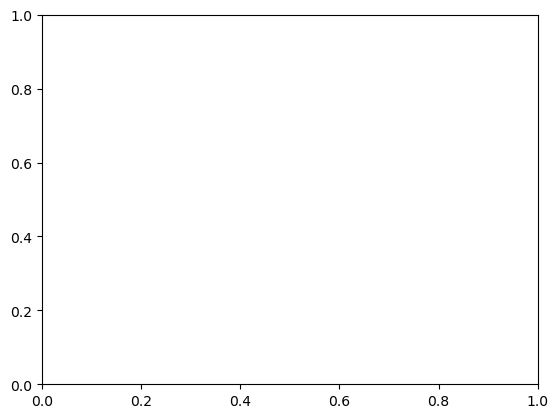

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

# First dataset
ax.plot(bkg_counts, sensitivities['10GeV'], color='grey')
ax.errorbar(
bkg_counts, sensitivities['10GeV'], yerr=y_err_1_sigma["10GeV"],
    fmt='o', mfc='steelblue', mec='navy', ecolor='black',
    capsize=5, label='10 GeV')
ax.errorbar(
    bkg_counts, sensitivities['10GeV'], yerr=y_err_2_sigma["10GeV"],
    fmt='none', ecolor='black', capsize=5
)

# Second dataset
ax.plot(bkg_counts, sensitivities['60GeV'], color='grey')
ax.errorbar(
    bkg_counts, sensitivities['60GeV'], yerr=y_err_1_sigma["60GeV"],
    fmt='o', mfc='seagreen', mec='darkgreen', ecolor='black',
    capsize=5, label='60 GeV'
)
ax.errorbar(
    bkg_counts, sensitivities['60GeV'], yerr=y_err_2_sigma["60GeV"],
    fmt='none', ecolor='black', capsize=5
)

# Third dataset
ax.plot(bkg_counts, sensitivities['1000GeV'], color='grey')
ax.errorbar(
    bkg_counts, sensitivities['1000GeV'], yerr=y_err_1_sigma["1000GeV"],
    fmt='o', mfc='gold', mec='darkorange', ecolor='black',
    capsize=5, label='1000 GeV '
)
ax.errorbar(
    bkg_counts, sensitivities['1000GeV'], yerr=y_err_2_sigma["1000GeV"],
    fmt='none', ecolor='black', capsize=5
)

# Labels and formatting
ax.legend()
ax.set_ylabel(r'WIMP-nucleon $\sigma_{\rm SI}$ [cm$^2$]', fontsize=15)
ax.set_xlabel('Pb214 background [counts/ty]', fontsize=15)
ax.set_ylim(5e-50, 1e-46)
ax.set_yscale('log')


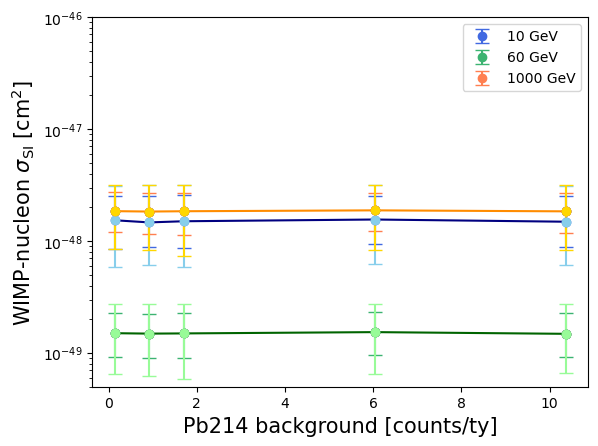

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

# First dataset
ax.plot(bkg_counts, sensitivies, color='navy')
ax.errorbar(bkg_counts, sensitivies, yerr=y_err_1_sigma, fmt='o', color='royalblue', capsize=5, label='10 GeV')
ax.errorbar(bkg_counts, sensitivies, yerr=y_err_2_sigma, fmt='o', color='skyblue', capsize=5)

# Second dataset
ax.plot(bkg_counts, sensitivies_60, color='darkgreen')
ax.scatter(bkg_counts, sensitivies_60, color='black')
ax.errorbar(bkg_counts, sensitivies_60, yerr=y_err_1_sigma_60, fmt='o', color='mediumseagreen', capsize=5, label='60 GeV')
ax.errorbar(bkg_counts, sensitivies_60, yerr=y_err_2_sigma_60, fmt='o', color='palegreen', capsize=5)

# Third dataset
ax.plot(bkg_counts, sensitivies_1000, color='darkorange')
ax.scatter(bkg_counts, sensitivies_1000, color='black')
ax.errorbar(bkg_counts, sensitivies_1000, yerr=y_err_1_sigma_1000, fmt='o', color='coral', capsize=5, label='1000 GeV')
ax.errorbar(bkg_counts, sensitivies_1000, yerr=y_err_2_sigma_1000, fmt='o', color='gold', capsize=5)

ax.legend()
ylab = r'WIMP-nucleon $\sigma_{\rm SI}$ [cm$^2$]'
ylim = (5e-50, 1e-46)
ax.set_ylabel(ylab, fontsize=15)
ax.set_xlabel('Pb214 background [counts/ty]', fontsize=15)
ax.set_ylim(ylim)
ax.set_yscale('log')


## WIMP Discovery, exposures against concentrations

### 2D Plots

/tmp/ipykernel_44302/3547960620.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[]

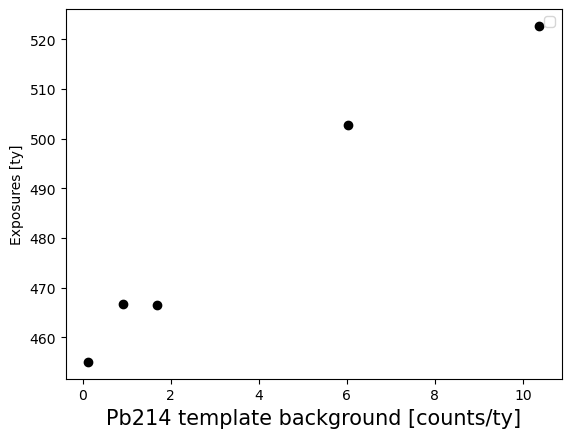

In [14]:
exposures = [455.02, 466.70, 466.42, 502.66, 522.72]
bkg_conc = [0.0079, 0.05395, 0.1, 0.355, 0.61]
bkg_counts = [0.134, 0.916, 1.699, 6.034, 10.371]



plt.scatter(bkg_counts, exposures, color='black', label = '')


plt.legend()

plt.xlabel('Pb214 template background [counts/ty]', fontsize=15)
plt.ylabel('Exposures [ty]')
plt.plot()

/tmp/ipykernel_44302/2006589085.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[]

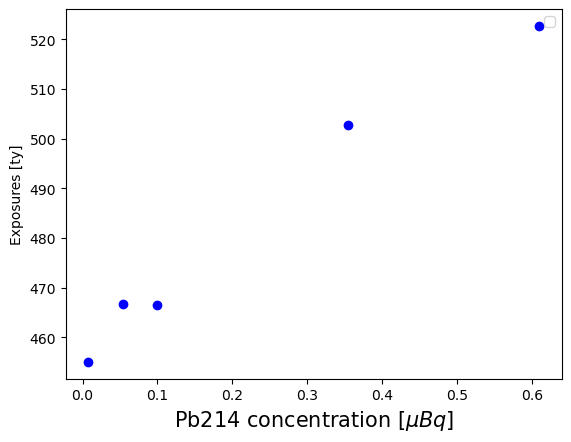

In [16]:
plt.scatter(bkg_conc, exposures, color='blue')


plt.legend()

plt.xlabel(r'Pb214 concentration [$\mu Bq$]', fontsize=15)
plt.ylabel('Exposures [ty]')
plt.plot()

### Newer plot

/tmp/ipykernel_1221338/2172882079.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[]

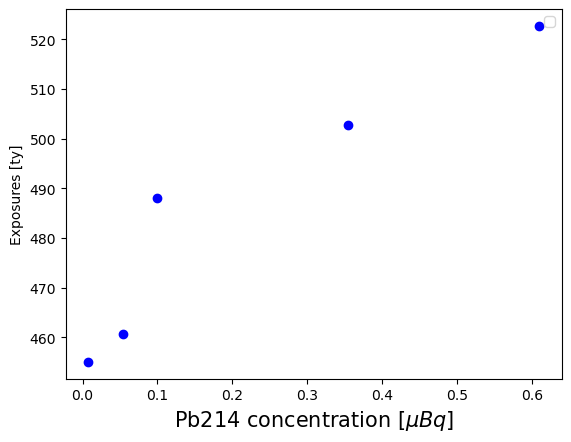

In [3]:
exposures = [455.02, 460.72, 488.08, 502.66, 522.72]
bkg_conc = [0.0079, 0.05395, 0.1, 0.355, 0.61]
bkg_counts = [0.134, 0.916, 1.699, 6.034, 10.371]


plt.scatter(bkg_conc, exposures, color='blue')
plt.legend()

plt.xlabel(r'Pb214 concentration [$\mu Bq$]', fontsize=15)
plt.ylabel('Exposures [ty]')
plt.plot()

## 3D Plots

/tmp/ipykernel_867852/2899799539.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[]

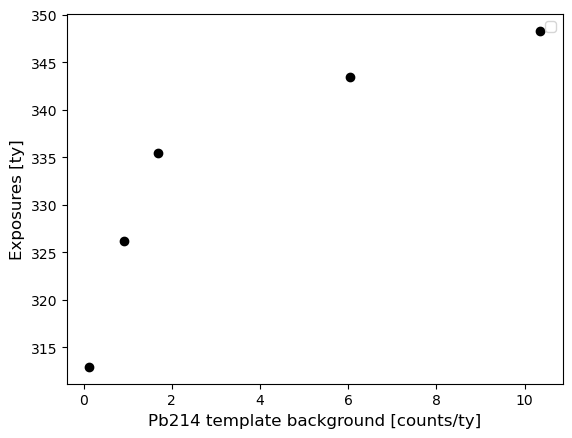

In [6]:
exposures = [312.95, 326.22, 335.45, 343.43, 348.30]
bkg_conc = [0.0079, 0.05395, 0.1, 0.355, 0.61]
bkg_counts = [0.134, 0.917, 1.698, 6.031, 10.354]

plt.scatter(bkg_counts, exposures, color='black', label = '')
plt.legend()
plt.xlabel('Pb214 template background [counts/ty]', fontsize=12)
plt.ylabel('Exposures [ty]', fontsize=12)
plt.plot()

/tmp/ipykernel_867852/1830434907.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[]

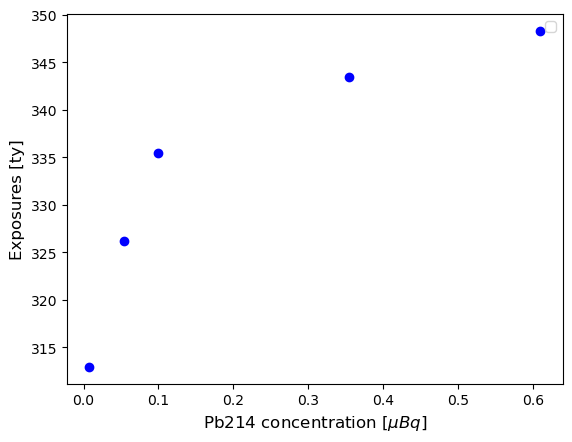

In [7]:
plt.scatter(bkg_conc, exposures, color='blue')

plt.legend()
plt.xlabel(r'Pb214 concentration [$\mu Bq$]', fontsize=12)
plt.ylabel('Exposures [ty]', fontsize=12)
plt.plot()

## 3D - Neutrons

In [ ]:
exposures = [312.95, 326.22, 335.45, 343.43, 348.30]
bkg_conc = [0.0079, 0.05395, 0.1, 0.355, 0.61]

plt.scatter(bkg_conc, exposures, color='blue')

plt.legend()
plt.xlabel(r'Pb214 concentration [$\mu Bq$]', fontsize=12)
plt.ylabel('Exposures [ty]', fontsize=12)
plt.plot()